In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch
import sys
sys.path.append("../analysis")
sys.path.append("../model")
from networks import *
from analysis_util import load_models
from mpl_toolkits.mplot3d import Axes3D

In [453]:
data1 = np.load('./raw_data/affine/discrete_val.npy')
data2 = np.load('./raw_data/affine/pend_val.npy')
data3 = np.load('./raw_data/affine/fluid_val.npy')
data4 = np.load('./raw_data/affine/duffing_val.npy')

In [474]:
data = data4
num = 10
plt.rcParams.update({'font.size': 12})


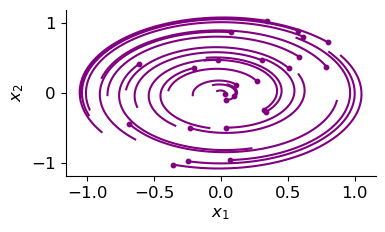

In [487]:
random_idx = np.random.randint(0, len(data), num)
fig, ax = plt.subplots(1, 1, figsize=(4, 2.2), dpi=100)
for i in random_idx:
    ax.plot(data[i , :50, 0], data[i , :50, 1], color='purple')
    ax.scatter(data[i , 0, 0], data[i , 0, 1], color='purple', s=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plt.show()

In [483]:
data = data3
num = 25
plt.rcParams.update({'font.size': 12})

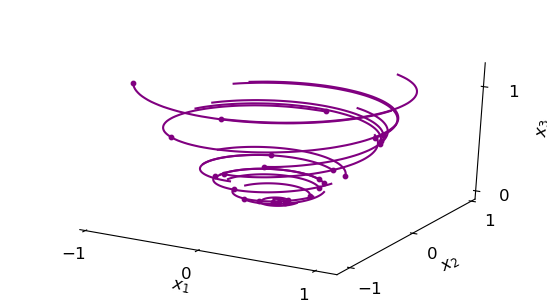

In [486]:
fig = plt.figure(figsize=(4*1.7, 2.2*1.7), dpi=100)
ax = fig.gca(projection='3d')
random_idx = np.random.randint(0, len(data), 25)

for i in random_idx:
    ax.plot(data[i , :50, 0], data[i , :50, 1] , data[i , :50, 2], color='purple')
    ax.scatter(data[i , 0, 0], data[i , 0, 1], data[i , 0, 2], color='purple', s=10)
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r"$x_1$")

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_zlabel(r"$x_3$")
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([0, 1])
plt.show()

In [259]:
with open("fluid.p", 'rb') as f:
    [X, Y, eig_magnitude, eig_phase] = pickle.load(f)

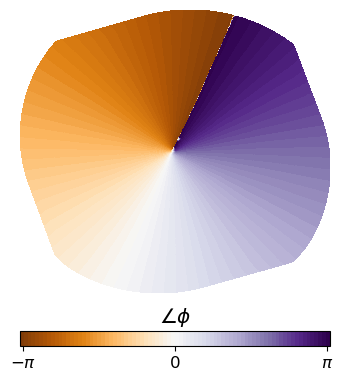

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(4, 5), dpi=100)
f = ax.tricontourf(X, Y, eig_phase, levels=100, cmap='PuOr')
#ax.set_xlim([-0.4, 0.4])
#ax.set_ylim([-0.4, 0.4])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
cbar = fig.colorbar(f, orientation="horizontal", pad=0.1)
cbar.set_ticks([-3.141,0, 3.141])
cbar.set_ticklabels([r"$-\pi$",0, r"$\pi$"])
cbar.ax.set_title(r"$\angle \phi$")
#cbar.ax.set_title(r"$|\phi$|")
plt.show()

In [438]:
models, configs = load_models(LREN, '../saved/logs/models/lren', ['lren-fluid', 
                                                                  'lren-spider', 
                                                                  'lren-pendulum'])
data1 = np.load('./raw_data/affine/discrete_val.npy')
data2 = np.load('./raw_data/affine/pend_val.npy')
data3 = np.load('./raw_data/affine/fluid_val.npy')
import torch
import matplotlib.ticker as ticker

In [445]:
model = models[1]
data = data1
y, y_pred = model(torch.Tensor(data))
y_pred = y_pred.detach().numpy()
y = y.detach().numpy()

In [446]:
se = (y_pred[:, :, :2] - y[:, :, :2])**2
se.shape
mse = np.mean(np.mean(se, axis=2), axis=1)

In [447]:
np.random.randint(0, 2)

0

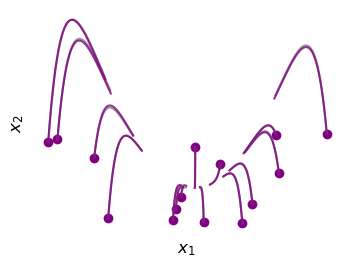

In [448]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=100)

idx = np.random.randint(0, len(data), 15)
for i in idx:
    ax.scatter(data[i, 0, 0], data[i, 0, 1], color='purple')
    ax.plot(data[i,:50, 0], data[i,:50, 1], color='grey', alpha=0.8)
    ax.plot(y_pred[i,:, 0], y_pred[i,:, 1], color='purple', alpha=0.8)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plt.show()

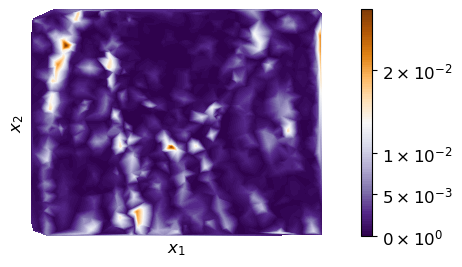

In [452]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=100)
#levels = np.logspace(-5, -2.3, 100)
f = ax.tricontourf(data[:,0, 0], data[:,0, 1], mse, levels=100, cmap="PuOr_r")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
ticks = [0, 1e-6, 1e-5, 1e-4, 1e-3, 5e-3]
ticks = [0, 5e-3, 1e-2, 2e-2]
cbar = fig.colorbar(f, orientation="vertical", pad=0.1, format=ticker.FuncFormatter(fmt))
cbar.set_ticks(ticks)

In [263]:
y, y_pred, koopman = model.forward(torch.Tensor(data), return_ko=True)
y = y.detach().numpy()
data = data[:, :y.shape[1], :]
y_pred = y_pred.detach().numpy()
y = y.reshape((np.prod(y.shape[:-1]), y.shape[-1]))
data = data.reshape((np.prod(data.shape[:-1]), data.shape[-1]))

In [264]:
X = data[:, 0]
Y = data[:, 1]

In [265]:
w, v = np.linalg.eig(koopman)

In [266]:
eig_fns = v@y.T

In [267]:
eig_mag = np.absolute(eig_fns) 
eig_angle = np.angle(eig_fns) 

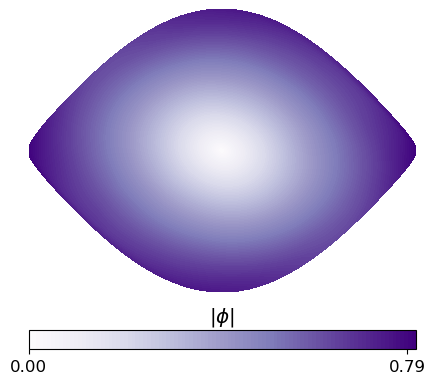

In [288]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
f = ax.tricontourf(X, Y, eig_mag[3], levels=100, cmap='Purples')
#ax.set_xlim([-0.4, 0.4])
#ax.set_ylim([-0.4, 0.4])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
cbar = fig.colorbar(f, orientation="horizontal", pad=0.1)
cbar.set_ticks([0, 0.79])
#cbar.set_ticklabels([r"$-\pi$",0, r"$\pi$"])
cbar.ax.set_title(r"$|\phi$|")
plt.show()

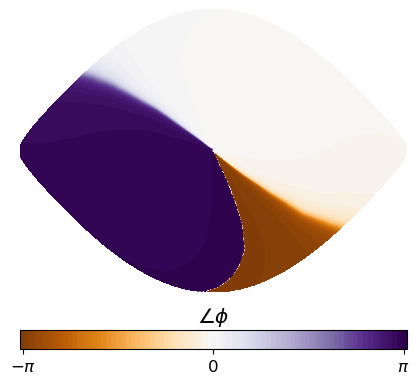

In [281]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
f = ax.tricontourf(X, Y, eig_angle[4], levels=100, cmap='PuOr')
#ax.set_xlim([-0.4, 0.4])
#ax.set_ylim([-0.4, 0.4])
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([])
ax.set_xticks([])
cbar = fig.colorbar(f, orientation="horizontal", pad=0.1)
cbar.set_ticks([-3.142,0, 3.142])
cbar.set_ticklabels([r"$-\pi$",0, r"$\pi$"])
cbar.ax.set_title(r"$\angle \phi$")
#cbar.ax.set_title(r"$|\phi$|")
plt.show()